In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [3]:
# Load two images
img1 = cv2.imread('56.jpg')
img2 = cv2.imread('watermark_no_copy.png')
img2 =cv2.resize(img2,(300,300))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1.shape

(629, 1118, 3)

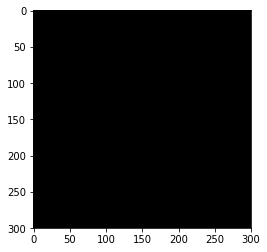

In [4]:

x_offset = 1118-300
y_offset = 629-300

# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:629,x_offset:1118] # BOTTOM RIGHT CORNER

plt.imshow(roi)

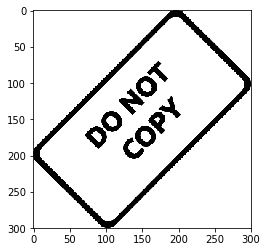

In [5]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray')

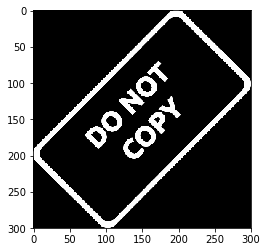

In [92]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

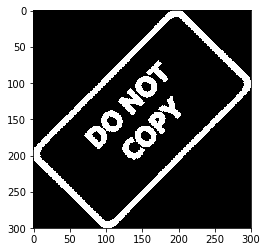

In [93]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(bk)

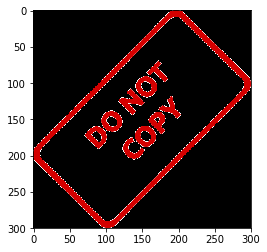

In [94]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

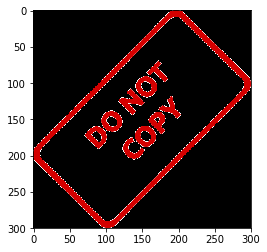

In [95]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

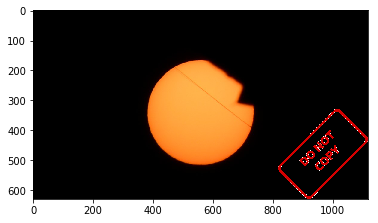

In [96]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)